## №1 Оптимизация с ограничениями

Лабораторную работу выполнили: Иконников Александр, Спасюк Мария, Хуртин Алексей

#### **Задание 1.1 (0.5 балла)**
Для начала напишем оптимизацию с ограничениями. Необходимо оптимизировать функцию:

$$
10x^2 - (4x + 3y)^2
$$

*Ограничение:* y>=0
В качестве границ параметров `pbounds` x и y установите значения (2, 4) и (-3, 3), соответственно

In [1]:
!pip install bayesian-optimization

In [2]:
from bayes_opt import BayesianOptimization
def black_box_function_with_constraints(x, y):
    if y < 0:
        return -100
    else:
        return 10*x*x - (4*x+3*y)**2

Запустим `optimizer.max` и проверим что получилось

In [3]:
optimizer = BayesianOptimization(
    f=black_box_function_with_constraints,
    pbounds = {'x': (2, 4), 'y': (-3, 3)},
    random_state=0,
    verbose=0
)

optimizer.maximize(
    init_points=2,
    n_iter=100
)

print(f'The best solution with constraints is {optimizer.max}')

The best solution with constraints is {'target': -26.341359872899382, 'params': {'x': 2.0323922787595334, 'y': 0.031747854975622936}}


#### **Задание 1.2 (1 балл)**
Теперь вам необходимо построить математическую модель задачи и решить её с помощью метода выше.

Описание:
Фабрика производит три вида продукции: изделие A, изделие B и изделие C. Для производства каждого изделия требуются ресурсы: сырье, электроэнергия и рабочая сила. У фабрики есть ограниченные ресурсы:

Сырье: не более 500 кг в неделю.

Электроэнергия: не более 800 кВт·ч в неделю.

Рабочая сила: не более 600 человеко-часов в неделю.

Для производства одного изделия A требуется:
- 2 кг сырья,
- 3 кВт·ч электроэнергии,
- 4 человеко-часа.

Для производства одного изделия B требуется:
- 4 кг сырья,
- 2 кВт·ч электроэнергии,
- 3 человеко-часа.

Для производства одного изделия C требуется:
- 3 кг сырья,
- 5 кВт·ч электроэнергии,
- 2 человеко-часа.

Прибыль от продажи одного изделия составляет 1000, 1500 и 1200 рублей, соответственно.

Решение:

Математическая модель задачи:

Переменные: x1 - количество изделия A, x2 - количество изделия B, x3 - количество изделия C.

Целевая функция: z = 1000x1 + 1500x2 + 1200x3 -> max

Ограничения:

2x1 + 4x2 + 3x3 <= 500

3x1 + 2x2 + 5x3 <= 800

4x1 + 3x2 + 2x3 <= 600

In [4]:
def black_box_function_with_constraints(x1, x2, x3):
    if 2*x1 + 4*x2 + 3*x3 > 500 or 3*x1 + 2*x2 + 5*x3 > 800 or 4*x1 + 3*x2 + 2*x3 > 600:
        return -100
    else:
        return 1000*x1+1500*x2+1200*x3

In [5]:
optimizer = BayesianOptimization(
    f=black_box_function_with_constraints,
    pbounds = {'x1': (0, 1000), 'x2': (0, 1000), 'x3': (0, 1000)},
    random_state=0,
    verbose=0
)

optimizer.maximize(
    init_points=2,
    n_iter=150
)

In [6]:
print('The best solution with constraints: ')
print('x1 =', optimizer.max['params']['x1'], 'x2 =', optimizer.max['params']['x2'], 'x3 =', optimizer.max['params']['x3'])
print('Значение целевой функции (target): ', optimizer.max['target'])

The best solution with constraints: 
x1 = 95.8943882912453 x2 = 2.0930413917534807 x3 = 93.70968638077215
Значение целевой функции (target):  211485.57403580213


Не знаю, правильно ли было брать целую часть от переменных в функции black_box_constraints.
Просто у нас переменные означают количество штук каждого типа изделия, логично, чтобы переменные принимали целые значения


#### **Задание 2 (2 балла)**

Теперь рассмотрим динамическую оптимизацию.
Предположим, у вас есть система, которую вы оптимизируете, но ее поведение меняется со временем.  В данном случае, целевая функция меняется в зависимости от "времени" (итерации оптимизации).
Необходимо оптимизировать функцию f(x, time), где x - входной параметр, а time - текущая итерация оптимизации. Функция имеет следующий вид:

In [7]:
def dynamic_function(x, time):
    if time < 50:
        return -((x - 2)**2)  # Минимум в x=2 до 50-й итерации
    else:
        return -((x - 5)**2)  # Минимум в x=5 после 50-й итерации

Используйте Байесовскую оптимизацию для поиска максимума этой функции. Обратите внимание, что оптимизатор должен адаптироваться к изменению целевой функции.

Подсказки:

Используйте optimizer.maximize() в цикле, имитируя течение времени.

После определенного количества итераций (например, 50), обучите оптимизатор заново на последних данных, чтобы "забыть" старую форму функции.  Можно использовать optimizer.set_bounds() для сужения пространства поиска вокруг нового оптимума.

Вспомните, как мы учитывали ограничения на лекции (слайд 18).

In [22]:
from bayes_opt import BayesianOptimization

def constrained_function(x, y):
    return dynamic_function(x, y)

optimizer = BayesianOptimization(
    f=constrained_function,
    pbounds = {'x': (-10, 10), 'y': (0, 50)},
    random_state=0,
    verbose=0
)

for ts in range(100):
  if ts == 50:
    optimizer.set_bounds({'x': (-10, 10), 'y': (50, 100)})
  optimizer.maximize(
      init_points=2,
      n_iter=1
  )



print(f'Best solution: {optimizer.max}')

Best solution: {'target': -0.00021534359117350666, 'params': {'x': 4.985325410016852, 'y': 72.12277859157862}}


#### **Задание 3 (3 балла)**

Байесовская оптимизация без применения дополнительных методов может испытывать трудности в высоких размерностях.  В этом задании вы исследуете, как меняется производительность при увеличении размерности задачи.

Определите функцию high_dimensional_function(x) с n переменными, представляющую собой, например, сумму квадратов:

In [26]:
def high_dimensional_function(x):
    return -sum([(xi - i)**2 for i, xi in enumerate(x)]) # Минимум x[i] = i


Проведите Байесовскую оптимизацию этой функции для n = 2, 3, 4, 5. (По баллу за каждое из измерений 3-5). Задайте разумные границы для каждой переменной (например, [-5, 5]).

Запишите лучшее найденное значение целевой функции и количество итераций, необходимых для его достижения, для каждого значения n. Проанализируйте, как увеличивается количество итераций при увеличении размерности.

Предупреждение: код будет работать долго, не пугайтесь.


![boo_cat_.jpg](attachment:boo_cat_.jpg)

In [41]:
def high_dimensional_function(x):
  return -sum([(xi - i)**2 for i, xi in enumerate(x)])

def f2(x0, x1):
  return high_dimensional_function([x0, x1])

def f3(x0, x1, x2):
  return high_dimensional_function([x0, x1, x2])

def f4(x0, x1, x2, x3):
  return high_dimensional_function([x0, x1, x2, x3])

def f5(x0, x1, x2, x3, x4):
  return high_dimensional_function([x0, x1, x2, x3, x4])

dimensions = [2, 3, 4, 5]
results = {}

for n in dimensions:
    f_calls = 0
    print(f"Оптимизация для n = {n}")
    if n == 2:
      f = f2
    elif n == 3:
      f = f3
    elif n == 4:
      f = f4
    elif n == 5:
      f = f5

    optimizer = BayesianOptimization(
      f=f,
      pbounds = {f'x{i}': (-5, 5) for i in range(n)} ,
      random_state=0,
      verbose=0
    )
    optimizer.maximize(
      init_points=2,
      n_iter=50
    )
    results[n] = optimizer.max
    print(f"Лучшее значение для n = {n}: {results[n]}")

print("Результаты:")
for n, res in results.items():
    print(f"n = {n}: {res}")

Оптимизация для n = 2
Лучшее значение для n = 2: {'target': -6.181476199537212e-05, 'params': {'x0': 0.007692843917693537, 'x1': 0.9983767580422569}}
Оптимизация для n = 3
Лучшее значение для n = 3: {'target': -0.0004630242543616542, 'params': {'x0': 0.0007586075203429324, 'x1': 0.979625091415406, 'x2': 1.9931216376105085}}
Оптимизация для n = 4
Лучшее значение для n = 4: {'target': -0.0007728811917337316, 'params': {'x0': -0.009677952535692461, 'x1': 1.0061642299921294, 'x2': 1.983174557769984, 'x3': 3.018924195856605}}
Оптимизация для n = 5
Лучшее значение для n = 5: {'target': -0.00368153092369259, 'params': {'x0': -0.047567383284615135, 'x1': 1.0186277503634034, 'x2': 1.998160847900787, 'x3': 3.0059254926161576, 'x4': 3.9678536480396662}}
Результаты:
n = 2: {'target': -6.181476199537212e-05, 'params': {'x0': 0.007692843917693537, 'x1': 0.9983767580422569}}
n = 3: {'target': -0.0004630242543616542, 'params': {'x0': 0.0007586075203429324, 'x1': 0.979625091415406, 'x2': 1.993121637610

#### **Задание 4 (3.5 балла)**

Сравните производительность Байесовской оптимизации с методом случайного поиска (Random Search) на функции high_dimensional_function из задания 2 для n = 5. Оцените, какой метод быстрее находит решение, близкое к оптимальному. Зафиксируйте число вызовов целевой функции для обоих методов.


Подсказки:

-Реализуйте метод случайного поиска (или один из известных вам методов) самостоятельно.

-Используйте одинаковое количество вызовов целевой функции для обоих методов.

-Замеряйте время выполнения каждого метода.

In [42]:
import random
import time
import numpy as np

In [65]:
def high_dimensional_function(x):
    return -sum([(xi - i)**2 for i, xi in enumerate(x)]) # Минимум x[i] = i

def f5(x0, x1, x2, x3, x4):
  return high_dimensional_function([x0, x1, x2, x3, x4])

def random_search(n_calls):
    """Выполняет случайный поиск."""
    best_x = None
    best_value = float('-inf')

    num_evals = 0
    st_ts = time.time()

    for _ in range(n_calls):
        x = np.random.uniform(-5, 5, size=5)

        value = high_dimensional_function(x)
        num_evals += 1

        if value > best_value:
            best_value = value
            best_x = x

    return {'target': best_value, 'params': best_x, 'time': f'{(time.time() - st_ts):.4f}'}

n = 5
pbounds = {f'x{i}': (-5, 5) for i in range(n)}  # Границы для каждой переменной
n_calls = 100

# Your code here
st_ts = time.time()
optimizer = BayesianOptimization(
  f=f5,
  pbounds = {f'x{i}': (-5, 5) for i in range(n)} ,
  random_state=0,
  verbose=0
)
optimizer.maximize(
  init_points=2,
  n_iter=n_calls
)

rnd_res = random_search(n_calls)

print(f"Результат Байесовской оптимизации: {optimizer.max}, Время: {(time.time() - st_ts):.4f} сек")
print(f"Результат Случайного поиска: {rnd_res}")

Результат Байесовской оптимизации: {'target': -0.0029576106334811727, 'params': {'x0': 0.019582517085362672, 'x1': 0.9815324567558809, 'x2': 1.9998165103611318, 'x3': 3.0389023567783657, 'x4': 3.973173549000093}}, Время: 68.3004 сек
Результат Случайного поиска: {'target': -0.9872155247010476, 'params': array([-0.3445069 ,  0.89915424,  1.13083444,  2.68746507,  4.07234502]), 'time': '0.0005'}


#### **Задание 5.2. (0.25 балла)**
Вы дошли до конца, поздравляем! Вставьте сюда мем или смешную картинку, если она нам понравится, вы получите дополнительные 0.25 балла к оценке.

P.s. За оскорбления, прямые нападки и распостранение ненависти -0.25 балла от оценки, выбирайте с умом. 🙃

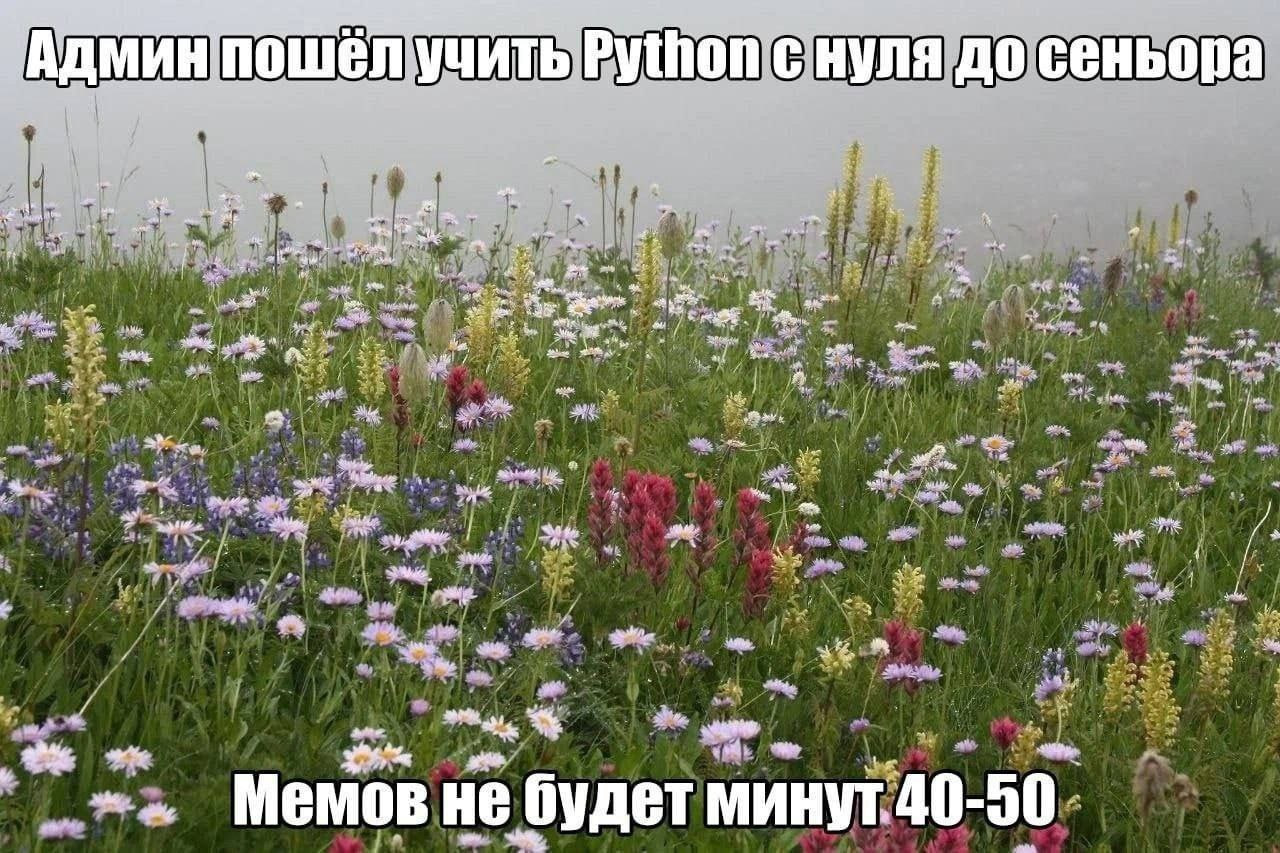

In [ ]:
# Your code here